<a href="https://colab.research.google.com/github/darkwingpatil/Ml_hackethons/blob/main/Cap1Grp20_V3__MultiModal_cosinesimilarity_30k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d eeshawn/flickr30k

Dataset URL: https://www.kaggle.com/datasets/eeshawn/flickr30k
License(s): other
100% 4.08G/4.08G [00:54<00:00, 126MB/s] 
100% 4.08G/4.08G [00:54<00:00, 80.4MB/s]


In [ ]:
!unzip flickr30k.zip

In [ ]:
import os

In [ ]:
image_dir = '/content/flickr30k_images'
cap_file = '/content/captions.txt'
print ("Length of image directory: ", len(os.listdir(image_dir)))
with open(cap_file, 'r') as f:
  print ("Length of caption file: ", len(f.readlines()))

Length of image directory:  31783
Length of caption file:  158916


In [ ]:
with open(cap_file, 'r') as f:
  for i in range(5):
    print (f.readline())

image_name,comment_number,comment

1000092795.jpg,0,Two young guys with shaggy hair look at their hands while hanging out in the yard .

1000092795.jpg,1,Two young  White males are outside near many bushes .

1000092795.jpg,2,Two men in green shirts are standing in a yard .

1000092795.jpg,3,A man in a blue shirt standing in a garden .



In [ ]:

import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel

In [ ]:
# create make directory img_folder

# Create the directory if it doesn't exist
img_embedding = "img_embedding"
txt_embedding = "txt_embedding"
os.makedirs(img_embedding, exist_ok=True)
os.makedirs(txt_embedding, exist_ok=True)

In [ ]:
# Load the pre-trained CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# Define input and output folders
image_folder = image_dir
output_folder = "/content/img_embedding"

In [ ]:
for image_name in os.listdir(image_folder):
    # Check if the file is an image (add more extensions if needed)
    if image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(image_folder, image_name)

        try:
            # Load and preprocess the image
            image = Image.open(image_path).convert("RGB")
            inputs = processor(images=image, return_tensors="pt", padding=True).to(device)

            # Extract image embeddings
            with torch.no_grad():
                image_features = model.get_image_features(**inputs)

            # Normalize the embeddings
            image_features = image_features / image_features.norm(p=2, dim=-1, keepdim=True).to(device)

            # Save the embeddings
            embedding_path = os.path.join(output_folder, f"{os.path.splitext(image_name)[0]}.pt")
            torch.save(image_features, embedding_path)

            print(f"Processed and saved: {embedding_path}")

        except Exception as e:
            print(f"Failed to process {image_name}: {e}")

Streaming output truncated to the last 5000 lines.
Processed and saved: /content/img_embedding/439037721.pt
Processed and saved: /content/img_embedding/4867858371.pt
Processed and saved: /content/img_embedding/4515634167.pt
Processed and saved: /content/img_embedding/1344692842.pt
Processed and saved: /content/img_embedding/282052899.pt
Processed and saved: /content/img_embedding/209803062.pt
Processed and saved: /content/img_embedding/4715586059.pt
Processed and saved: /content/img_embedding/4458984161.pt
Processed and saved: /content/img_embedding/1501438486.pt
Processed and saved: /content/img_embedding/244812876.pt
Processed and saved: /content/img_embedding/4439029503.pt
Processed and saved: /content/img_embedding/3062433945.pt
Processed and saved: /content/img_embedding/4641294847.pt
Processed and saved: /content/img_embedding/1678345419.pt
Processed and saved: /content/img_embedding/3741462565.pt
Processed and saved: /content/img_embedding/209101256.pt
Processed and saved: /cont

In [ ]:
print(len(os.listdir("/content/img_embedding")))

31783


In [ ]:
# Path to the captions file
captions_file_path = cap_file  # Replace with the actual path
output_dir = "/content/txt_embedding"

In [ ]:
# Read and process captions file
with open(captions_file_path, "r") as f:
    lines = f.readlines()
    print(f"Total number of lines in the file: {len(lines)}")

Total number of lines in the file: 158916


In [ ]:
158915/5

31783.0

In [ ]:
# Dictionary to store image captions
image_captions = {}

In [ ]:
# Parse captions and group them by image name
for index, line in enumerate(lines):
    if index == 0:
      continue
    image_name, num, caption = line.strip().split(",",2 )
    # Remove the file extension at the end of the image name
    base_name = image_name.split(".")[0]
    if base_name not in image_captions:
        image_captions[base_name] = []
    image_captions[base_name].append(caption)

In [ ]:
import itertools

# Print the first 5 key-value pairs
for key, value in itertools.islice(image_captions.items(), 5):
    print(f"Key: {key}, Value: {value}")

Key: 1000092795, Value: ['Two young guys with shaggy hair look at their hands while hanging out in the yard .', 'Two young  White males are outside near many bushes .', 'Two men in green shirts are standing in a yard .', 'A man in a blue shirt standing in a garden .', 'Two friends enjoy time spent together .']
Key: 10002456, Value: ['Several men in hard hats are operating a giant pulley system .', 'Workers look down from up above on a piece of equipment .', 'Two men working on a machine wearing hard hats .', 'Four men on top of a tall structure .', 'Three men on a large rig .']
Key: 1000268201, Value: ['A child in a pink dress is climbing up a set of stairs in an entry way .', 'A little girl in a pink dress going into a wooden cabin .', 'A little girl climbing the stairs to her playhouse .', 'A little girl climbing into a wooden playhouse', 'A girl going into a wooden building .']
Key: 1000344755, Value: ['Someone in a blue shirt and hat is standing on stair and leaning against a windo

In [ ]:
# Generate and save text embeddings
for image_name, captions in image_captions.items():
    for i, caption in enumerate(captions):
        suffix = i + 1
        #image_name = image_name.split(".")[0]
        embedding_name = f"{image_name}_{suffix}.pt"

        # Preprocess the caption
        inputs = processor(text=[caption], return_tensors="pt", padding=True, truncation = True, max_length =77).to(device)

        # Extract text embeddings
        with torch.no_grad():
            text_features = model.get_text_features(**inputs)

        # Normalize the embeddings
        text_features = text_features / text_features.norm(p=2, dim=-1, keepdim=True).to(device)

        # Save the embeddings to the specified folder
        torch.save(text_features, os.path.join(output_dir, embedding_name))

        print(f"Caption is: {caption} Saved embedding: {embedding_name}")

In [ ]:
# Specify the folder path
def print_file_count(folder_path):
    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    # Count the number of files
    file_count = len(files)

    # Print the count
    print(f"Number of files in '{folder_path}': {file_count}")

In [ ]:
print (print_file_count(img_embedding))
print (print_file_count(txt_embedding))

Number of files in 'img_embedding': 31783
None
Number of files in 'txt_embedding': 158915
None


In [ ]:
# import shutil
# from google.colab import files

In [ ]:
# folder names
# folder1_to_download = "/content/img_embedding"
# folder2_to_download = "/content/txt_embedding"

# img_zip_1 = "img_embedding.zip"  # Name of the output zip file
# txt_zip_2 = "txt_embedding.zip"  # Name of the output zip file

# # Compress the folder into a zip file
# shutil.make_archive(img_zip_1.replace('.zip', ''), 'zip', folder1_to_download)
# shutil.make_archive(txt_zip_2.replace('.zip', ''), 'zip', folder2_to_download)

# # Download the zip files
# files.download(img_zip_1)
# files.download(txt_zip_2)

In [ ]:
# !pip install gdown==4.6.2
# import shutil
# import os

In [ ]:
# import gdown
# file_id1 = 'https://drive.google.com/file/d/17icNB_CL7CKP-k3vn0reBpWmrzLb25fn/view?usp=drive_link'
# out_file1 = 'txt_embedding.zip'
# gdown.download(file_id1, out_file1, quiet=False)

# file_id2 = 'https://drive.google.com/file/d/1IA76FH2ks65AtjCUCoa52fJ7vlNGuLua/view?usp=drive_link'
# out_file2 = 'img_embedding.zip'
# gdown.download(file_id2, out_file2, quiet=False)

In [ ]:
# import shutil
# # Import necessary libraries
# #import patoolib
# import os

# from google.colab import files
# from google.colab import drive
# drive.mount('/content/drive')

# # Install patool (if not already installed)
# #!pip install patool==1.12

In [ ]:
# Specify the path to the zip file in your Google Drive
# source_folder1 = '/content/drive/MyDrive/Colab Notebooks/Capstone/30k/img_embedding.zip'
# source_folder2 = '/content/drive/MyDrive/Colab Notebooks/Capstone/30k/txt_embedding.zip' # Replace with your file path

# destination_folder = '/content/'  # This is the Colab content folder

# # Copy the file
# shutil.copy(source_folder1, destination_folder)#, dirs_exist_ok=True)
# print(f'Folder copied to {destination_folder}')

# shutil.copy(source_folder2, destination_folder)#, dirs_exist_ok=True)
# print(f'Folder copied to {destination_folder}')

In [ ]:


# # Define the folder paths
# img_embedding_folder = "img_embedding"
# txt_embedding_folder = "txt_embedding"

# # Check if the folders exist, and create them if they don't
# if not os.path.exists(img_embedding_folder):
#   os.makedirs(img_embedding_folder)
#   print(f"Folder '{img_embedding_folder}' created.")
# else:
#   print(f"Folder '{img_embedding_folder}' already exists.")

# if not os.path.exists(txt_embedding_folder):
#   os.makedirs(txt_embedding_folder)
#   print(f"Folder '{txt_embedding_folder}' created.")
# else:
#   print(f"Folder '{txt_embedding_folder}' already exists.")

Folder 'img_embedding' already exists.
Folder 'txt_embedding' already exists.


In [ ]:
# !unzip /content/img_embedding.zip -d /content/img_embedding

In [ ]:
# !unzip /content/txt_embedding.zip -d /content/txt_embedding

In [ ]:
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel

In [ ]:
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torch.nn as nn
from torch.nn import functional as F
from torch.nn.functional import cosine_similarity
from torch.optim import Adam
import numpy as np

In [ ]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

Using device: cuda


In [ ]:
import re
import pickle

In [ ]:
class EmbeddingDataset(Dataset):
    def __init__(self, img_dir, txt_dir):
        """
        Args:
            img_dir (str): Path to the directory containing image embeddings (.pt files).
            txt_dir (str): Path to the directory containing text embeddings (.pt files).
        """
        self.img_dir = img_dir
        self.txt_dir = txt_dir

        # Load all image embedding filenames
        self.image_files = [
            f for f in os.listdir(img_dir) if f.endswith('.pt')
        ]

        # Ensure corresponding text embeddings exist
        self.dataset = []
        for img_file in self.image_files:
            base_name = os.path.splitext(img_file)[0]
            for suffix in range(1, 6):  # Assuming suffix ranges from 1 to 5
                txt_file = f"{base_name}_{suffix}.pt"
                txt_path = os.path.join(txt_dir, txt_file)
                if os.path.exists(txt_path):
                    self.dataset.append((os.path.join(img_dir, img_file), txt_path))

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        img_path, txt_path = self.dataset[idx]

        # Load image embedding
        img_tensor = torch.load(img_path, weights_only=True)

        # Load text embedding
        txt_tensor = torch.load(txt_path, weights_only=True)

        return img_tensor, txt_tensor

In [ ]:
image_directory = '/content/img_embedding'
text_directory = '/content/txt_embedding'

In [ ]:
dataset_instance = EmbeddingDataset(image_directory, text_directory)

In [ ]:
print(f"Total samples in the dataset: {len(dataset_instance)}")

Total samples in the dataset: 158915


In [ ]:
# Access a sample
img_tensor, txt_tensor = dataset_instance[0]
print(f"Image tensor shape: {img_tensor.shape}")
print(f"Text tensor shape: {txt_tensor.shape}")

Image tensor shape: torch.Size([1, 512])
Text tensor shape: torch.Size([1, 512])


In [ ]:
for i in range(3):  # Display the first 3 samples
    img_tensor, txt_tensor = dataset_instance[i]
    print(f"Sample {i + 1}:")
    print(f"Image Tensor Shape: {img_tensor.shape}")
    print(f"Text Tensor Shape: {txt_tensor.shape}")


Sample 1:
Image Tensor Shape: torch.Size([1, 512])
Text Tensor Shape: torch.Size([1, 512])
Sample 2:
Image Tensor Shape: torch.Size([1, 512])
Text Tensor Shape: torch.Size([1, 512])
Sample 3:
Image Tensor Shape: torch.Size([1, 512])
Text Tensor Shape: torch.Size([1, 512])


In [ ]:
# Create a DataLoader
batch_size = 35
dataloader = DataLoader(dataset_instance, batch_size=batch_size, shuffle=True)

# Iterate through DataLoader
for batch_idx, (img_batch, txt_batch) in enumerate(dataloader):
    print(f"Batch {batch_idx + 1}:")
    print(f"Image Batch Shape: {img_batch.shape}")
    print(f"Text Batch Shape: {txt_batch.shape}")
    break  # Display only the first batch

Batch 1:
Image Batch Shape: torch.Size([35, 1, 512])
Text Batch Shape: torch.Size([35, 1, 512])


In [ ]:
# train the model
# Define model (linear layer for fine-tuning)
embedding_dim = 512  # CLIP's embedding dimension
from torch import nn, optim

model = nn.Linear(embedding_dim, embedding_dim).cuda()  # Simple fine-tuning layer

# Optimizer and loss function
optimizer = optim.AdamW(model.parameters(), lr=1e-5)
cosine_similarity = nn.CosineSimilarity(dim=-1)
mse_loss = nn.MSELoss()


# Training loop
for epoch in range(5):
    model.train()
    total_loss = 0
    for batch_idx, (img_batch, txt_batch) in enumerate(dataloader)::
        optimizer.zero_grad()

        image_embeds = img_batch.cuda()
        text_embeds = txt_batch.cuda()

        # Pass embeddings through the model
        image_embeds = model(image_embeds)
        text_embeds = model(text_embeds)

        # Compute cosine similarity
        sim_score = cosine_similarity(image_embeds, text_embeds)

        # Target similarity is 1 for matching pairs
        target_score = torch.ones_like(sim_score).cuda()

        # Compute loss (you can also try contrastive loss here)
        loss = mse_loss(sim_score, target_score)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(dataloader)}")

# Save the fine-tuned model
torch.save(model.state_dict(), "fine_tuned_linear_layer.pth")

In [ ]:
# Initialize counters for global accuracy calculation
total_correct = 0
total_samples = 0

# Process all batches
for batch_idx, (img_batch, txt_batch) in enumerate(dataloader):
    # Move batches to the same device
    img_batch = img_batch.to(device)
    txt_batch = txt_batch.to(device)

    # Get the actual batch size for the current batch (could be smaller than 35 for the last batch)
    current_batch_size = img_batch.size(0)

    # Reduce dimensions via mean pooling
    img_reduced = img_batch.mean(dim=1)  # Shape: [current_batch_size, embedding_dim]
    txt_reduced = txt_batch.mean(dim=1)  # Shape: [current_batch_size, embedding_dim]

    # Normalize embeddings for cosine similarity
    img_norm = F.normalize(img_reduced, p=2, dim=1)  # Normalize image embeddings
    txt_norm = F.normalize(txt_reduced, p=2, dim=1)  # Normalize text embeddings

    # Compute similarity matrix (cosine similarity)
    similarity_matrix = torch.mm(img_norm, txt_norm.t())  # Shape: [current_batch_size, current_batch_size]
    print(similarity_matrix,"logg the similarity_matrix")

    # Find the most similar text embedding for each image embedding
    most_similar_idx = torch.argmax(similarity_matrix, dim=1)  # Shape: [current_batch_size]

    # Calculate accuracy
    ground_truth = torch.arange(current_batch_size, device=device)  # [0, 1, 2, ..., current_batch_size - 1]
    correct_predictions = (most_similar_idx == ground_truth).sum().item()
    total_correct += correct_predictions
    total_samples += current_batch_size

    batch_accuracy = correct_predictions / current_batch_size * 100  # Accuracy for this batch
    print(f"Batch {batch_idx + 1}:")
    #print(f"  Similarity Matrix: \n{similarity_matrix}")
    print(f"  Predicted Indices: {most_similar_idx}")
    print(f"  Ground Truth: {ground_truth}")
    print(f"  Accuracy: {batch_accuracy:.2f}%")

# Global accuracy
global_accuracy = total_correct / total_samples * 100
print(f"\nOverall Accuracy: {global_accuracy:.2f}%")


In [ ]:
# Load CLIP model and processor
# model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
# processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [ ]:
# model.to(device)

In [ ]:
print (device)

cuda


In [ ]:
# Load image embeddings from the folder `img_embedding`
img_embedding_folder = 'img_embedding'
image_embeddings = []
image_paths = []

In [ ]:
# Load all the embeddings from .pt files in the folder
for filename in os.listdir(img_embedding_folder):
    if filename.endswith(".pt"):
        # Construct the full file path
        file_path = os.path.join(img_embedding_folder, filename)

        # Load the embedding from the .pt file
        embedding = torch.load(file_path, weights_only=True)  # Shape: [embedding_dim]

        # Assuming the filename (without extension) is the image name
        image_name = filename.split('.')[0]  # Remove .pt extension to get image name

        # Append the embedding and image path to the lists
        image_embeddings.append(embedding)
        image_paths.append(image_name)

# Convert the list of embeddings to a tensor and move to the same device
image_embeddings = torch.stack(image_embeddings).to(device)  # Shape: [num_images, embedding_dim]
image_embeddings = image_embeddings.squeeze(1)

# Normalize image embeddings
image_embeddings = F.normalize(image_embeddings, p=2, dim=-1)

In [ ]:
print(f"Image Embeddings Shape: {image_embeddings.shape}")
print(f"Image Paths: {image_paths}")

In [ ]:
def retrieve_image_from_text(text_query, all_img_embd):
    # Encode the text query
    text_inputs = processor(text=[text_query], return_tensors="pt", padding=True, truncation = True, max_length = 77).to(device)#, truncation=True)

    # Extract text embeddings
    with torch.no_grad():
      text_embeddings = model.get_text_features(**text_inputs)

    # Normalize text embeddings
    text_embeddings = text_embeddings / text_embeddings.norm(p=2, dim=-1, keepdim=True).to(device)

    print(f"Text Query: {text_query}")
    print(f"Text Embeddings Shape: {text_embeddings.shape}")

    # Ensure that text embeddings are 2D and image embeddings are 2D
    # if text_embeddings.dim() == 1:
    #     text_embeddings = text_embeddings.unsqueeze(0)  # Make it [1, embedding_dim]
    # Ensure that text and image embeddings are on the same device


    # Calculate cosine similarity between the text and image embeddings
    similarity_scores = torch.mm(text_embeddings, all_img_embd.T)  # Shape: [1, num_images]

    print(similarity_scores,"what are scores that have been retrieved")

    # Get the index of the most similar image
    most_similar_idx = torch.argmax(similarity_scores, dim=1).item()

    print(most_similar_idx, "most_similar_idx")

    # Retrieve the corresponding image path
    retrieved_image_name = image_paths[most_similar_idx]
    retrieved_image_name = retrieved_image_name.replace(" ", "")
    #retrieved_score = similarity_scores[0][most_similar_idx].item()

    return retrieved_image_name

In [ ]:
# !kaggle datasets download -d eeshawn/flickr30k
# !unzip flickr30k.zip

In [ ]:
# Example usage
text_query = "Two young guys with shaggy hair look at their hands while hanging out in the yard ."
best_image_name = retrieve_image_from_text(text_query, image_embeddings)
print(f"Retrieved Image: {best_image_name}")

Text Query: Two young guys with shaggy hair look at their hands while hanging out in the yard .
Text Embeddings Shape: torch.Size([1, 512])
tensor([[0.2648, 0.1529, 0.1513,  ..., 0.1870, 0.1989, 0.1688]],
       device='cuda:0') what are scores that have been retrieved
14069 most_similar_idx
Retrieved Image: 2574824768


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

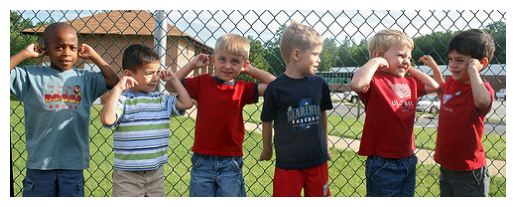

In [ ]:
im_path = f"/content/flickr30k_images/{best_image_name}.jpg"
img = Image.open(im_path)
plt.imshow(img)
plt.axis('off')
plt.show()

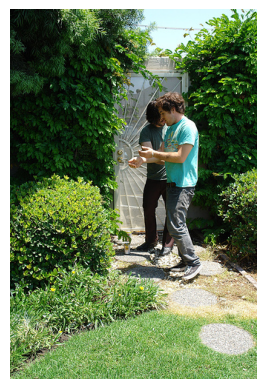

In [ ]:
im_path = f"/content/flickr30k_images/1000092795.jpg"
img = Image.open(im_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
caption_embedding_folder = 'txt_embedding'
caption_embeddings_lst = []
captions_lst = []

In [ ]:
for filename in os.listdir(caption_embedding_folder):
    if filename.endswith(".pt"):
        file_path = os.path.join(caption_embedding_folder, filename)
        embedding = torch.load(file_path, weights_only=True).to(device)
        embedding = embedding / embedding.norm(p=2, dim=-1, keepdim=True)
        caption_embeddings_lst.append(embedding)
        captions_lst.append(filename)

In [ ]:
captions_file = "/content/captions.txt"
def extract_third_part(caption_heading):
    """
    Opens a file, finds a specific line, splits it, and returns the third part.


    Args:
        filename (str): The name of the file to open. Defaults to "captions.txt".

    Returns:
        str: The third part of the split line, or None if the line is not found.
    """
    #filename = os.path.join("/content/",{filename})
    caption_heading = caption_heading.split(".")[0]
    caption_heading = caption_heading.replace("_", ".jpg,")
    print(f"Caption index is : {caption_heading}")
    try:
        with open(captions_file, "r") as file:  # Open the file in read-only mode
            for line in file:  # Iterate through each line
                if caption_heading in line:  # Check if the line contains the target phrase
                    parts = line.strip().split(",")  # Split the line by commas
                    if len(parts) >= 3:  # Ensure there are at least 3 parts
                        return parts[2]  # Return the third part
                    else:
                        print("Line does not have 3 parts after splitting.")
                        return None
            print("Line containing 'best_caption_idx' not found in the file.")
            return None  # Return None if the line is not found
    except FileNotFoundError:
        print(f"File '{filename}' not found.")
        return None

# Example usage
# result = extract_third_part("3660303751_4.pt")
# if result:
#     print(f"The third part is: {result}")

In [ ]:
# Assuming you're using CLIP to extract features and define a set of captions
def generate_caption_from_image(image_path):

    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt", padding=True).to(device)

    # Extract image features
    with torch.no_grad():
        image_embed = model.get_image_features(**inputs)
    # Normalize the embeddings
    image_embed = image_embed / image_embed.norm(p=2, dim=-1, keepdim=True).to(device)
    #print(f"Image Embeddings Shape: {image_embed.shape}")

    # Caption embeddings to tensors
    caption_embeddings_stk = torch.stack(caption_embeddings_lst).to(device)
    caption_embeddings_stk = caption_embeddings_stk.squeeze(1)
    #print(f"Caption Embeddings Shape: {caption_embeddings_stk.shape}")


    # Compute similarity scores (cosine similarity)
    similarity_scores = torch.mm(image_embed, caption_embeddings_stk.T)  # Shape: [1, num_templates]
    best_caption_idx = torch.argmax(similarity_scores, dim=1).item()
    #print(f"Best Similarity score is : ", torch.argmax(similarity_scores, dim=1))

    extracted_caption = extract_third_part(captions_lst[best_caption_idx])
    #print(f"Extracted Caption: {extracted_caption}")

    # Return the best caption for the image
    return extracted_caption

Caption index is : 3660303751.jpg,4
Generated Caption: A man is sitting in a harness and washing a window .


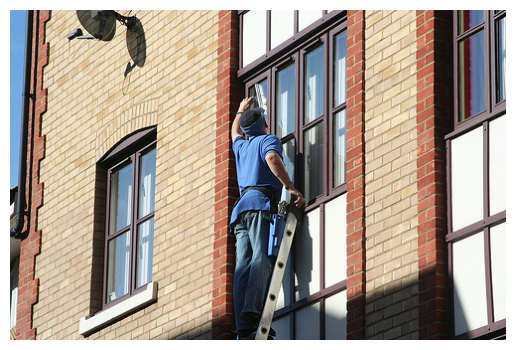

In [ ]:
# Example usage
image_path = "/content/flickr30k_images/1000344755.jpg"
caption = generate_caption_from_image(image_path)
print(f"Generated Caption: {caption}")
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

# Create a test dataset and calcualte the accuracies

**1) Calcualte the accuracy of caption to caption retrival**

**2) Calcualte the accuracy of caption to Image retrival**

**3) Calcualte the accuracy of Image to caption retrival**

# Prepare test data: Images and related captions

In [ ]:
# image_captions dictionay containg image name as key and 5 captions as values
# split the dictionary by 20%
keys = list (image_captions.keys())
split_index = int(0.2 * len(keys))
testing_keys = keys[:split_index]
testing_dict = {key: image_captions[key] for key in testing_keys}
print (f"length of testing_dict is : {len(testing_dict)}")
print (f"length of image_captions is : {len(image_captions)}")
k,v = next(iter(testing_dict.items()))
print (f"key is : {k}")
print (f"value is : {v}")

length of testing_dict is : 6356
length of image_captions is : 31783
key is : 1000092795
value is : ['Two young guys with shaggy hair look at their hands while hanging out in the yard .', 'Two young  White males are outside near many bushes .', 'Two men in green shirts are standing in a yard .', 'A man in a blue shirt standing in a garden .', 'Two friends enjoy time spent together .']


Making flat list of test data captions

In [ ]:
capt_lst_flat = list(testing_dict.values())
capt_flat = [x for y in testing_dict.values() for x in y]
print (f"length of capt_lat_flat is : {len(capt_flat)}")
print (f"{capt_flat[0]}")

length of capt_lat_flat is : 31780
Two young guys with shaggy hair look at their hands while hanging out in the yard .


# Caption to caption retrival for test set#

In [ ]:
# Caption to caption retrival and calculate the accuracy
def caption_caption_retrieval_accuracy(all_captions_test, all_caption_embeddings_lst):
  correct = 0
  total = 0
  all_caption_embeddings = torch.stack(all_caption_embeddings_lst).to(device)
  all_caption_embeddings = all_caption_embeddings.squeeze(1)
  for caption in all_captions_test:
    #encode the text
    text_inputs = processor(text=[caption], return_tensors="pt", padding=True, truncation = True, max_length=77).to(device)#, truncation=True)
    #extract text embeddings
    with torch.no_grad():
      text_embeddings = model.get_text_features(**text_inputs)
    #Normalize the text embedding
    text_embeddings = text_embeddings / text_embeddings.norm(p=2, dim=-1, keepdim=True).to(device)
    print(f"Text Query: {caption}")
    #calculate cosine similarity between the text and image embeddings
    similarity_scores = torch.mm(text_embeddings, all_caption_embeddings.T)
    # Get the index of the most similar text
    most_similar_idx = torch.argmax(similarity_scores, dim=1).item()
    # Retrieve the corresponding caption
    retrieved_img_idx = captions_lst[most_similar_idx]
    k = retrieved_img_idx.replace(".pt", "")
    k1,k2 = k.rsplit("_",1)
    rtr_img = image_captions[k1]
    k2 = int(k2)
    retrieved_caption = rtr_img[k2-1]
    print(f"Retrieved Caption: {retrieved_caption}")
    if retrieved_caption == caption:
      correct += 1
    total += 1
  accuracy = correct / total
  return accuracy

In [ ]:
#calcualte accuracy for all captions from the
cap_to_cap_accuracy = caption_caption_retrieval_accuracy(capt_flat, caption_embeddings_lst)

Streaming output truncated to the last 5000 lines.
Text Query: A man stands speaking to a crowd of sitting people  all wearing business attire .
Retrieved Caption: A man stands speaking to a crowd of sitting people  all wearing business attire .
Text Query: An elderly gentleman in a suit gives an address to a group of seated listeners .
Retrieved Caption: An elderly gentleman in a suit gives an address to a group of seated listeners .
Text Query: An elderly gentleman is delivering a talk to an audience .
Retrieved Caption: An elderly gentleman is delivering a talk to an audience .
Text Query: An important older man gives a speech to reporters .
Retrieved Caption: An important older man gives a speech to reporters .
Text Query: A man talking to a group of people .
Retrieved Caption: A man talking to a group of people .
Text Query: Women sitting at a bar  two drinks on top of the bar with string lights in the background .
Retrieved Caption: Women sitting at a bar  two drinks on top of th

In [ ]:
#calcualte accuracy for all captions from the
cap_to_cap_accuracy = caption_caption_retrieval_accuracy(capt_flat, caption_embeddings_lst)

Streaming output truncated to the last 5000 lines.
Text Query: A man stands speaking to a crowd of sitting people  all wearing business attire .
Retrieved Caption: A man stands speaking to a crowd of sitting people  all wearing business attire .
Text Query: An elderly gentleman in a suit gives an address to a group of seated listeners .
Retrieved Caption: An elderly gentleman in a suit gives an address to a group of seated listeners .
Text Query: An elderly gentleman is delivering a talk to an audience .
Retrieved Caption: An elderly gentleman is delivering a talk to an audience .
Text Query: An important older man gives a speech to reporters .
Retrieved Caption: An important older man gives a speech to reporters .
Text Query: A man talking to a group of people .
Retrieved Caption: A man talking to a group of people .
Text Query: Women sitting at a bar  two drinks on top of the bar with string lights in the background .
Retrieved Caption: Women sitting at a bar  two drinks on top of th

In [ ]:
print (cap_to_cap_accuracy)

0.9995280050346129


# Caption to Image retrival for test set

In [ ]:
# 2. Retrive Image from caption and calcualte the accuracy
def caption_to_image_retrieval_accuracy(all_captions_test, a):
  accuracy = 0
  total = 0
  for caption in all_captions_test:
    retrieved_img = retrieve_image_from_text(caption, a)
    print (f"Retrieved Image {retrieved_img}")
    actual_img = ""
    for k, v in testing_dict.items():
      if caption in v:
        print(caption,"what is caption")
        print(v,"letss see the v")
        print(k,"lets see the name")
        actual_img = k
        break
    print (f"Actual Image {actual_img}")
    if retrieved_img.replace(" ","") == actual_img.replace(" ",""):
      accuracy += 1
      print (f"Accuracy is : {accuracy}")
    total += 1
  accuracy = accuracy / total
  return accuracy

In [ ]:
cap_to_img_accuracy = caption_to_image_retrieval_accuracy(capt_flat, image_embeddings)

Text Query: Two young guys with shaggy hair look at their hands while hanging out in the yard .
Text Embeddings Shape: torch.Size([1, 512])
Retrieved Image 2574824768
Two young guys with shaggy hair look at their hands while hanging out in the yard . what is caption
['Two young guys with shaggy hair look at their hands while hanging out in the yard .', 'Two young  White males are outside near many bushes .', 'Two men in green shirts are standing in a yard .', 'A man in a blue shirt standing in a garden .', 'Two friends enjoy time spent together .'] letss see the v
1000092795 lets see the name
Actual Image 1000092795
Text Query: Two young  White males are outside near many bushes .
Text Embeddings Shape: torch.Size([1, 512])
Retrieved Image 133905560
Two young  White males are outside near many bushes . what is caption
['Two young guys with shaggy hair look at their hands while hanging out in the yard .', 'Two young  White males are outside near many bushes .', 'Two men in green shirts 

KeyboardInterrupt: 

In [ ]:
print (cap_to_img_accuracy)

0.24185022026431718


## Image to caption retrival for test set

In [ ]:
test_imgs = list(testing_dict.keys())
print (f" one of the file name of test_imgs is : {test_imgs[3]}")

length of test_imgs is : 1000344755


In [ ]:
def image_to_caption_retrieval_accuracy(all_images_test):
  correct = 0
  total = 0
  for im in all_images_test:
    img_path = os.path.join("/content/flickr30k_images/",f"{im}.jpg")
    rtr_caption = generate_caption_from_image(img_path)
    rtr_img=''
    for k, v in testing_dict.items():
      if rtr_caption in v:
        rtr_img = k
        break
    if im.replace(" ","") == rtr_img.replace(" ",""):
      correct += 1
    total += 1
  accuracy = correct / total
  return accuracy

In [ ]:
img_to_cap_accuracy = image_to_caption_retrieval_accuracy(test_imgs)

Streaming output truncated to the last 5000 lines.
Caption index is : 2191779063.jpg,1
Best Similarity score is :  tensor([60153], device='cuda:0')
Caption index is : 2942514377.jpg,1
Best Similarity score is :  tensor([140553], device='cuda:0')
Caption index is : 2191788665.jpg,3
Best Similarity score is :  tensor([48340], device='cuda:0')
Caption index is : 2191896524.jpg,1
Best Similarity score is :  tensor([130873], device='cuda:0')
Caption index is : 2876954933.jpg,1
Best Similarity score is :  tensor([25427], device='cuda:0')
Caption index is : 5403974296.jpg,4
Best Similarity score is :  tensor([38405], device='cuda:0')
Caption index is : 1190083977.jpg,1
Best Similarity score is :  tensor([115061], device='cuda:0')
Caption index is : 128396207.jpg,4
Best Similarity score is :  tensor([145543], device='cuda:0')
Caption index is : 6664029089.jpg,4
Best Similarity score is :  tensor([70921], device='cuda:0')
Caption index is : 2192475933.jpg,1
Best Similarity score is :  tensor([1

In [ ]:
print (f"Image to caption accuracy is : {img_to_cap_accuracy}")

Image to caption accuracy is : 0.38357457520453114


In [ ]:
# Summarize Accuracies in a Table

import pandas as pd

data = {
    'Metric': ['Image to caption Retrieval', 'Caption-to-Caption Retrieval', 'Caption to Image Accuracy'],
    'Accuracy': [img_to_cap_accuracy, cap_to_cap_accuracy, cap_to_img_accuracy]
}

df = pd.DataFrame(data)
df

,Metric,Accuracy
0,Image to caption Retrieval,0.383575
1,Caption-to-Caption Retrieval,0.999497
2,Caption to Image Accuracy,0.241850
